<a href="https://colab.research.google.com/github/EdilsonPs/MAC04592021-Atividades/blob/main/K_means_Cluster_on_Chicago_City_Taxi_trips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

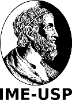 
# MAC0459 - General Test - 2021 - Tarefa 1:
<br />

**Task 1** : A realização da **análise exploratória de dados** baseada em métodos Python utilizada
para estudo do conjunto de dados do Centro de investigação e prevenção de acidentes aéreos
da Força Aérea - ***CENIPA*** baseou-se em 5 dos conjuntos de dados disponibilizados no [site do CENIPA](https://https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira), sendo eles:
<br /> 
<br /> 
Ocorrências, Tipos de ocorrências, recomendações e descrição de aeronaves, todos com
cobertura de janeiro de 2010 a agosto 2021; Os conjuntos de dados analisados possuem alto
teor de dados registrados e de fato, chega a existir dados tipo ‘NAN’, contudo, a quantidade
total de dados deste tipo se mostrou irrelevante para o estudo, o que não impactou de modo
significativo as conclusões, prosseguindo para visualização e descrição de informações
relevantes para o estudo, foram utilizadas as bibliotecas PANDAS para tratamento de
dataframes, o MATPLOTLIB para base e plotagem de gráficos através do SEABORN. 
<br />
<br />

Em última instância, a estratégia de abordagem dos datasets utilizou, majoritariamente, métodos
do PANDAS para filtragem da maior parte das questões idealizadas para o projeto, esta
metodologia foi utilizada de modo a produzir insights úteis que simulassem questões de uma
situação real de tomada de decisões, não baseando-se apenas em reprodução de códigos ou
criação dos mesmos sem sentido determinado, nessa ordem, as questões foram idealizadas
inicialmente e em seguida respondidas com utilização do Python.

#Chicago Taxis Trips dataset

[The Chicago Taxis Trips dataset](https://https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew)
   contains information on taxi rides in the city of Chicago from _2013_ to _2018_. The data includes details such as pickup and drop-off locations, timestamps, fare amounts, and tip amounts. The dataset provides a valuable resource for studying transportation patterns and demand in the city, as well as insights into factors that influence taxi ride pricing and tipping behavior. Additionally, the data can be used to inform policy decisions related to taxi services and urban planning.

##Import das bibliotecas utilizadas na tarefa:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
import warnings 
warnings.filterwarnings('ignore')


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("""/content/drive/My Drive/Atividades - Ciência e engenharia de dados/arquivos da prova - MAC 0459/chicago_taxi_trips_2016_12.csv""")

In [ ]:
df.head(4)

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,5240.0,2016-12-15 23:45:00,2016-12-16 00:00:00,900.0,2.5,NaN,307.0,8.0,32.0,10.75,2.45,0.0,1.0,14.70,Credit Card,NaN,754.0,410.0,64.0,231.0
1,1215.0,2016-12-12 07:15:00,2016-12-12 07:15:00,240.0,0.4,NaN,40.0,28.0,28.0,5.00,3.00,0.0,1.0,9.50,Credit Card,NaN,395.0,408.0,395.0,408.0
2,3673.0,2016-12-16 16:30:00,2016-12-16 17:00:00,2400.0,10.7,NaN,NaN,32.0,NaN,31.00,0.00,0.0,0.0,31.00,Cash,NaN,385.0,478.0,NaN,NaN
3,5400.0,2016-12-16 08:45:00,2016-12-16 09:00:00,300.0,0.0,NaN,787.0,8.0,8.0,5.25,2.00,0.0,0.0,7.25,Credit Card,101.0,688.0,206.0,161.0,649.0


In [13]:
df.describe()

,taxi_id,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1.245094e+06,1.245614e+06,1.245690e+06,0.0,787242.00000,1.131361e+06,1.111901e+06,1.245689e+06,1.245689e+06,1.245689e+06,1.245689e+06,1.245689e+06,671305.000000,1.131368e+06,1.131368e+06,1.113250e+06,1.113250e+06
mean,4.361896e+03,7.565623e+02,2.722639e+00,NaN,514.28259,2.281085e+01,2.106795e+01,1.240251e+01,1.376216e+00,4.248508e-03,9.401077e-01,1.481602e+01,83.407703,3.861354e+02,4.409327e+02,3.964387e+02,4.388257e+02
std,2.511681e+03,1.090555e+03,4.914539e+00,NaN,357.14152,1.879816e+01,1.694041e+01,2.153353e+01,2.654190e+00,1.260149e+00,1.523253e+01,2.784119e+01,38.243598,2.540746e+02,1.890504e+02,2.560480e+02,1.987694e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.00000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.229000e+03,3.600000e+02,4.000000e-01,NaN,225.00000,8.000000e+00,8.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,82.000000,1.700000e+02,3.460000e+02,1.700000e+02,2.700000e+02
50%,4.316000e+03,5.400000e+02,1.100000e+00,NaN,504.00000,2.400000e+01,1.600000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+00,101.000000,3.950000e+02,4.780000e+02,4.110000e+02,4.780000e+02
75%,6.524000e+03,9.000000e+02,2.400000e+00,NaN,807.00000,3.200000e+01,3.200000e+01,1.225000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.425000e+01,107.000000,6.040000e+02,6.100000e+02,6.810000e+02,6.100000e+02
max,8.760000e+03,8.634000e+04,9.000000e+02,NaN,1140.00000,7.700000e+01,7.700000e+01,9.026310e+03,4.220000e+02,8.000000e+02,6.666660e+03,9.026310e+03,118.000000,7.840000e+02,7.850000e+02,7.840000e+02,7.850000e+02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245712 entries, 0 to 1245711
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   taxi_id                 1245094 non-null  float64
 1   trip_start_timestamp    1245712 non-null  object 
 2   trip_end_timestamp      1245630 non-null  object 
 3   trip_seconds            1245614 non-null  float64
 4   trip_miles              1245690 non-null  float64
 5   pickup_census_tract     0 non-null        float64
 6   dropoff_census_tract    787242 non-null   float64
 7   pickup_community_area   1131361 non-null  float64
 8   dropoff_community_area  1111901 non-null  float64
 9   fare                    1245689 non-null  float64
 10  tips                    1245689 non-null  float64
 11  tolls                   1245689 non-null  float64
 12  extras                  1245689 non-null  float64
 13  trip_total              1245689 non-null  float64
 14  pa

## Pré processamento de dados:

   * transformação de dados com mediana e média próximas em log e plotar em seguida:

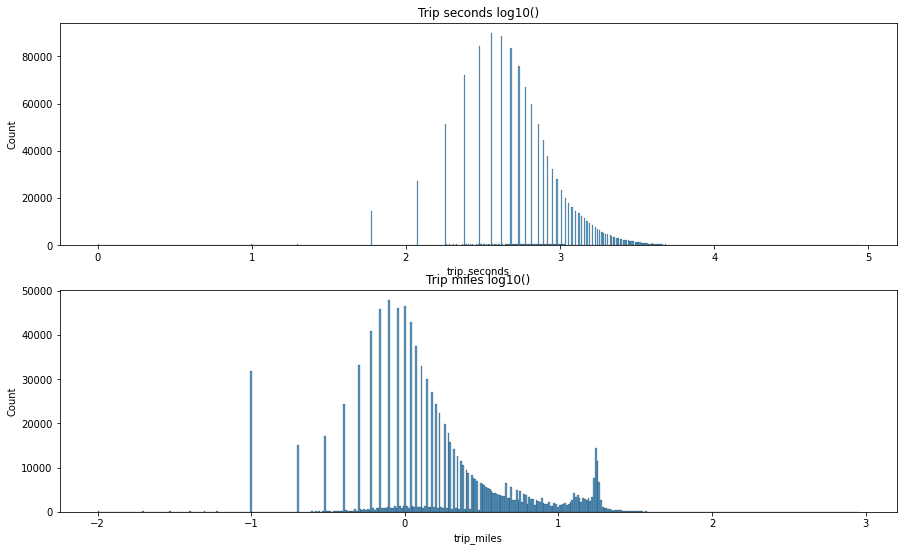

In [44]:
plt.figure(figsize=(15,9))
plt.tight_layout()
plt.subplot(2,1,1)
plt.title("Trip seconds log10()")
sns.histplot(np.log10(df.trip_seconds))

plt.subplot(2,1,2)
plt.title("Trip miles log10()")
sns.histplot(np.log10(df.trip_miles))
plt.show()


In [ ]:
df.columns

Index(['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tips',
       'tolls', 'extras', 'trip_total', 'payment_type', 'company',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude'],
      dtype='object')

In [11]:
locations = df[['pickup_latitude', 'pickup_longitude']]

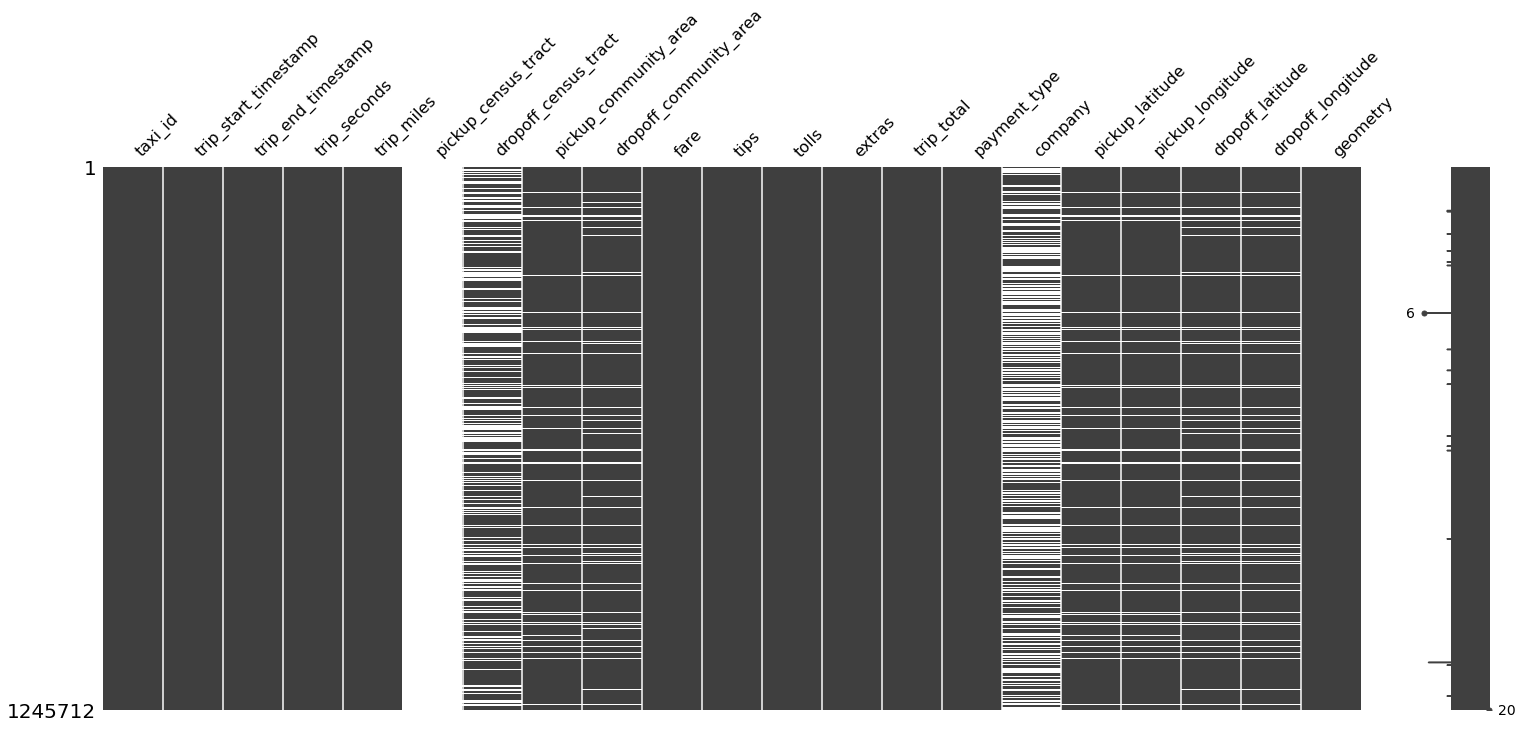

In [65]:
import missingno as msno

msno.matrix(df)
plt.show()

 

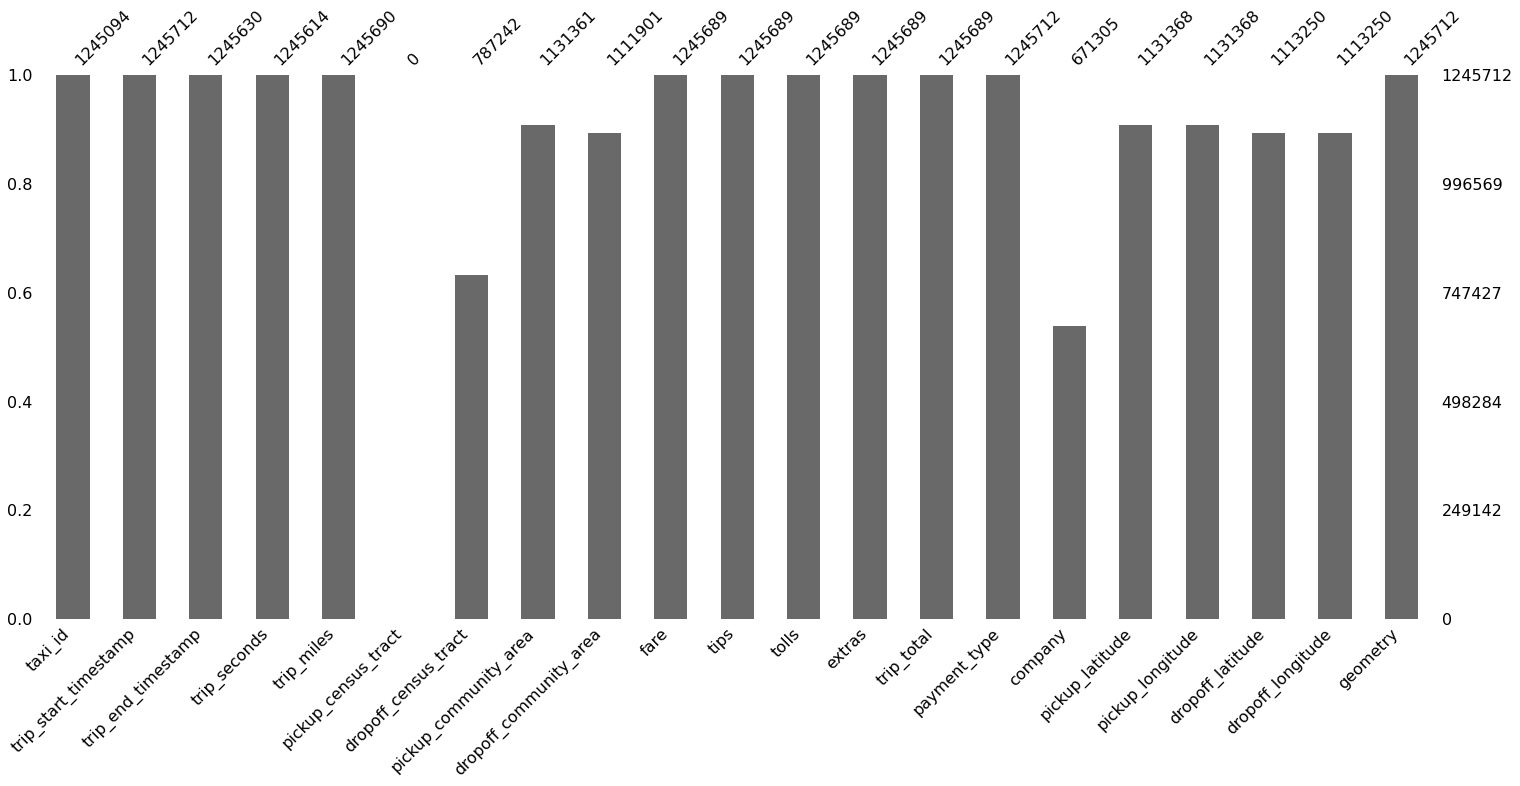

In [64]:
msno.bar(df)
plt.show()

In [8]:
geo_locations = np.stack((df['pickup_latitude'], df['pickup_longitude']), axis=1)
geo_locations

array([[754., 410.],
       [395., 408.],
       [385., 478.],
       ...,
       [385., 478.],
       [225.,   6.],
       [ nan,  nan]])

In [9]:
geo_locations1 = pd.DataFrame(geo_locations)

In [10]:
geo_locations1.replace([np.inf, -np.inf], np.nan)


,0,1
0,754.0,410.0
1,395.0,408.0
2,385.0,478.0
3,688.0,206.0
4,618.0,407.0
...,...,...
1245707,385.0,478.0
1245708,144.0,741.0
1245709,385.0,478.0
1245710,225.0,6.0


In [11]:
geo_locations1.dropna(inplace=True)

In [12]:
geo_locations1.to_numpy()

array([[754., 410.],
       [395., 408.],
       [385., 478.],
       ...,
       [144., 741.],
       [385., 478.],
       [225.,   6.]])

In [13]:
geo_locations_std = whiten(geo_locations1)

In [16]:
geo_locations_std

array([[2.96763311],
       [2.16873536],
       [1.55466191],
       ...,
       [2.52842806],
       [0.88556691],
       [0.03173759]])

In [ ]:
geo_locations1.describe(include='all')

,0,1
count,1.131368e+06,1.131368e+06
mean,3.861354e+02,4.409327e+02
std,2.540746e+02,1.890504e+02
min,5.000000e+00,1.000000e+00
25%,1.700000e+02,3.460000e+02
50%,3.950000e+02,4.780000e+02
75%,6.040000e+02,6.100000e+02
max,7.840000e+02,7.850000e+02


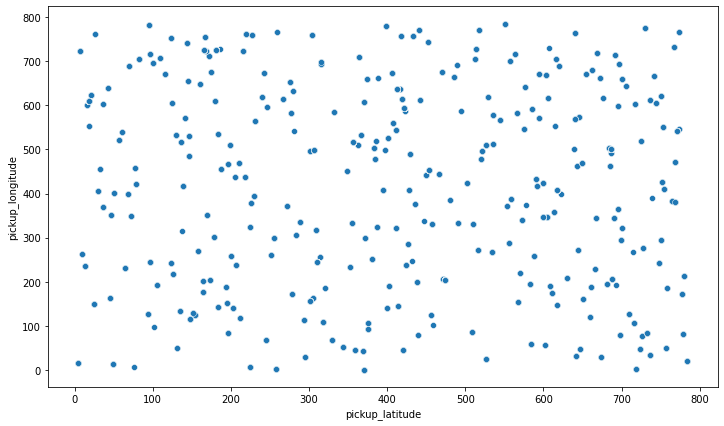

In [34]:
plt.figure(figsize=[12,7])
sns.scatterplot(x=df['pickup_latitude'], y=df['pickup_longitude'])


* Método elbow

In [32]:
def find_optimal_clusters(data, max_k):
    iters = 10
    sse = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, max_iter=iters).fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=[12,7])
    plt.plot(range(1, max_k+1), sse)
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.show()

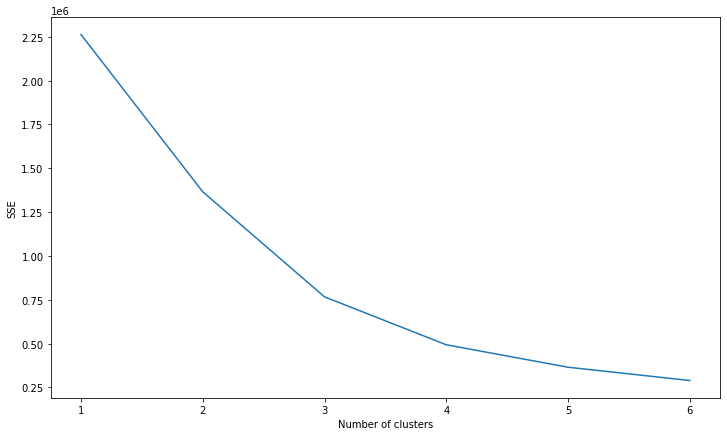

In [33]:
find_optimal_clusters(geo_locations_std, 6)

In [27]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', n_init = 10, max_iter = 300)

In [28]:
pred_y = kmeans.fit_predict(geo_locations1)

Text(0, 0.5, 'Longitude')

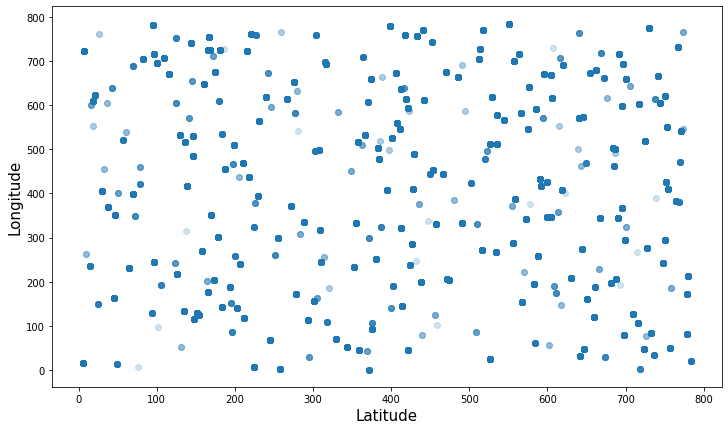

In [31]:
plt.figure(figsize=[12,7])
plt.scatter(geo_locations1[0], geo_locations1[1],alpha=0.2)
plt.xlabel('Latitude', size=15)
plt.ylabel('Longitude',size=15)

Text(0, 0.5, 'Longitude')

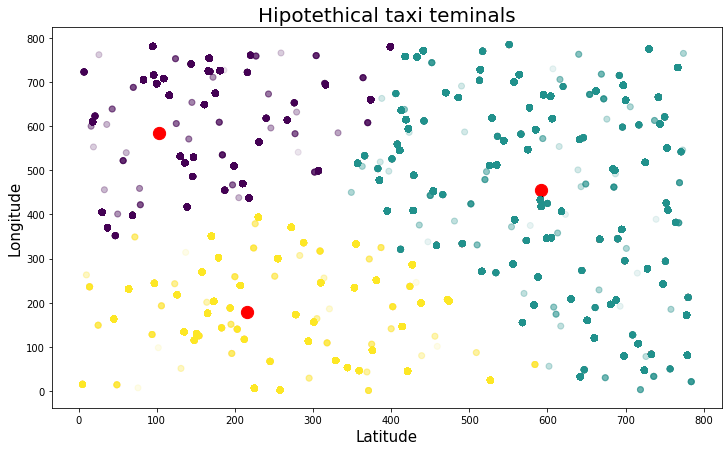

In [30]:
plt.figure(figsize=[12,7])
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s = 150, c = 'r') #posição de cada centroide no gráfico
plt.scatter(geo_locations1[0], geo_locations1[1], c =pred_y, alpha=0.1)
plt.title('Hipotethical taxi teminals',size=20)
plt.xlabel('Latitude', size=15)
plt.ylabel('Longitude',size=15)